In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

%pylab inline 

/Users/Xianbo/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


# Data Wrangling

In [2]:
#import csv file
data_gdp = pd.read_csv('GDP.csv')
data_nightlight_mean = pd.read_csv('nightlight mean.csv')
data_population = pd.read_csv('Population.csv')

In [3]:
#rename column
def rename_data(df):
    length_df = len(df.columns) -2
    templist = list(reversed(range(2015-length_df,2015)))
    column_name = ['FID', 'name']
    column_name.extend(templist)
    df.columns = column_name
    df.drop('name', axis = 1)

In [4]:
#rename
rename_data(data_population)
rename_data(data_gdp)
data_nightlight_mean = data_nightlight_mean.rename(columns = {'2005.1': '2007'})

In [5]:
#rename
data_gdp = data_gdp.replace('  ',np.nan)
data_nighlight_mean = data_nightlight_mean.replace('  ',np.nan)
data_population = data_population.replace('  ',np.nan)
data_gdp = data_gdp.replace(' ',np.nan)
data_nighlight_mean = data_nightlight_mean.replace(' ',np.nan)
data_population = data_population.replace(' ',np.nan)

# analysis

In [19]:
data_gdp_low = data_gdp.drop([233,255],axis = 0)
data_nightlight_mean_low = data_nightlight_mean.drop([233,255],axis = 0)
data_population_low = data_population.drop([233,255],axis = 0)

In [20]:
data_gdp_high = data_gdp.iloc[[233,255],:]
data_nightlight_mean_high = data_nightlight_mean.iloc[[233,255],:]
data_population_high = data_population.iloc[[233,255],:]

In [21]:
#x = np.arange(2000,2014)
dct = {}
#for i in x:
#    dct['data_%s' % i] = []
for i in range(2003,2014):
    m = 'low'
    dct['data_%s_%s' %(i,m)] = pd.DataFrame(data = list(data_gdp_low[i]), columns = ['gdp'], index = data_gdp_low[i].index)
    dct['data_%s_%s' %(i,m)]['nightlight_mean'] = data_nightlight_mean_low[str(i)]
    dct['data_%s_%s' %(i,m)]['population'] = data_population_low[i]
    dct['data_%s_%s' %(i,m)] = dct['data_%s_%s' %(i,m)].dropna()
    dct['data_%s_%s' %(i,m)] = dct['data_%s_%s' %(i,m)].astype(float)
    dct['data_%s_%s' %(i,m)][dct['data_%s_%s' %(i,m)]>30000] = \
     dct['data_%s_%s' %(i,m)][dct['data_%s_%s' %(i,m)]>30000]/10000
    m = 'high'
    dct['data_%s_%s' %(i,m)] = pd.DataFrame(data = list(data_gdp_high[i]), columns = ['gdp'], index = data_gdp_high[i].index)
    dct['data_%s_%s' %(i,m)]['nightlight_mean'] = data_nightlight_mean_high[str(i)]
    dct['data_%s_%s' %(i,m)]['population'] = data_population_high[i]
    dct['data_%s_%s' %(i,m)] = dct['data_%s_%s' %(i,m)].dropna()
    dct['data_%s_%s' %(i,m)] = dct['data_%s_%s' %(i,m)].astype(float)
    dct['data_%s_%s' %(i,m)][dct['data_%s_%s' %(i,m)]>30000] = \
     dct['data_%s_%s' %(i,m)][dct['data_%s_%s' %(i,m)]>30000]/10000

In [22]:
m = 'low'
for i in range(2003,2014): 
    y=np.asarray(dct['data_%s_%s' %(i,m)].gdp)
    X=np.asarray(dct['data_%s_%s' %(i,m)].iloc[:,1:])
    res=sm.OLS(y,X).fit()
    print res.rsquared

0.687009925822
0.703900596746
0.695779476925
0.704297913608
0.704665390729
0.723627953502
0.724131508568
0.734860784774
0.749463893395
0.753778826066
0.752360842666


In [23]:
i = 2003
m = 'low'
data_low = dct['data_%s_%s' %(i,m)]
for i in range(2004,2014):
    data_low = pd.concat([data_low, dct['data_%s_%s' %(i,m)]], ignore_index=True)

In [24]:
data = data_low

In [76]:
data = data_low

In [77]:
y=np.asarray(data.iloc[:,:].gdp)
X=np.asarray(data.iloc[:,1:])
res=sm.OLS(log(y),log(data.iloc[:,1:])).fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 1.295e+05
Date:                Fri, 02 Dec 2016   Prob (F-statistic):               0.00
Time:                        00:17:18   Log-Likelihood:                -3492.0
No. Observations:                3204   AIC:                             6988.
Df Residuals:                    3202   BIC:                             7000.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
nightlight_mean     0.3464      0.011     

In [78]:
y=np.asarray(data.iloc[:,:].gdp)
X=np.asarray(data.iloc[:,1:])
res=sm.OLS(log(y),log(X)).fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 1.295e+05
Date:                Fri, 02 Dec 2016   Prob (F-statistic):               0.00
Time:                        00:17:19   Log-Likelihood:                -3492.0
No. Observations:                3204   AIC:                             6988.
Df Residuals:                    3202   BIC:                             7000.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.3464      0.011     32.515      0.0

# GDP = exp(0.34log(nightlight_mean) +1.06population)
# = nightlight_mean^0.34 + population^1.06

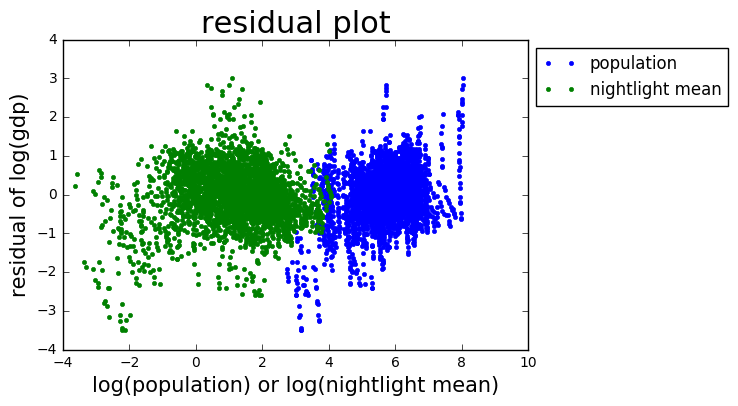

In [79]:
plot(log(data.population),res.predict()-log(y),'.',label = 'population')
plot(log(data.nightlight_mean),res.predict()-log(y),'.',label = 'nightlight mean')
title('residual plot', fontsize = 22)
xlabel('log(population) or log(nightlight mean)', fontsize = 15)
ylabel('residual of log(gdp)',fontsize = 15)

plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

# The residuals distributes almost randomly, so the regression model is a proper model

In [51]:
dct['data_%s_%s' %(i,m)].columns

Index([u'gdp', u'nightlight_mean', u'population'], dtype='object')

In [52]:
len(res.predict())

1785

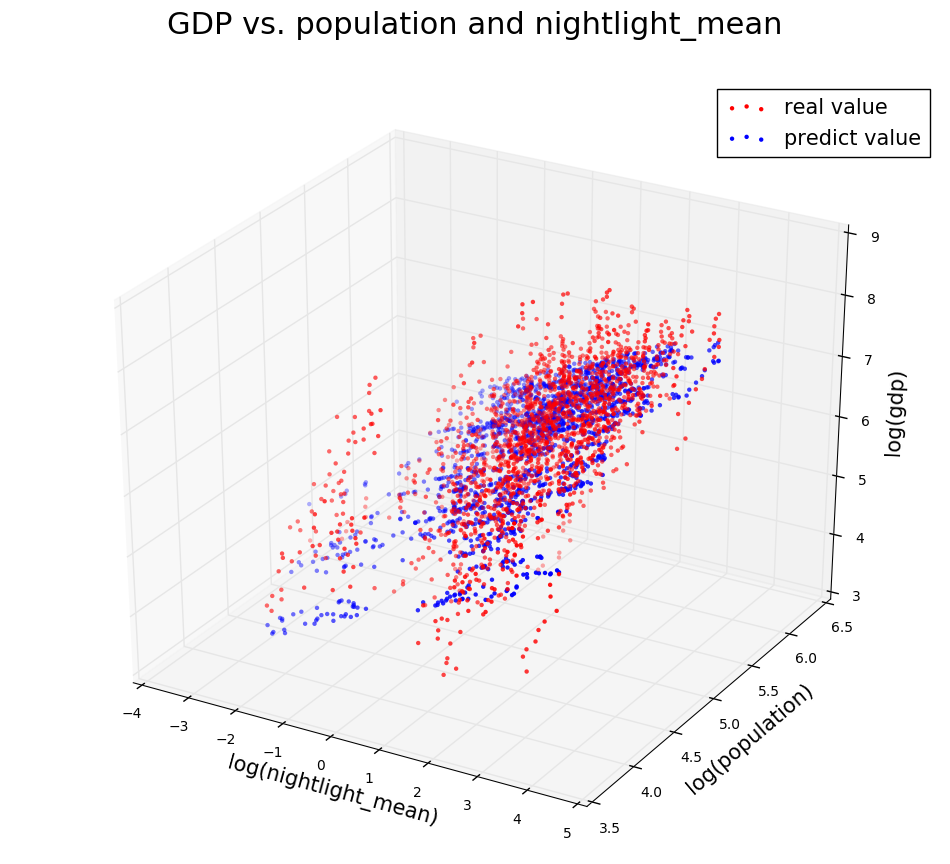

In [53]:

fig = plt.figure(figsize = (12,10))  # Create a plot with customized figure size (width, height)
ax = fig.gca(projection='3d')  # Extract the axis for further operations
ax.scatter(log(data.nightlight_mean), log(data.population), log(data.gdp),
           s = 10,  c = 'r',label = 'real value', edgecolor = 'none')
ax.scatter(log(data.nightlight_mean), log(data.population), res.predict(),
           s = 10,  c = 'b',label = 'predict value', edgecolor = 'none')
xlabel('log(nightlight_mean)',fontsize = 15)
ylabel('log(population)',fontsize = 15)
ax.set_zlabel('log(gdp)',fontsize = 15)
legend(fontsize = 15)
title('GDP vs. population and nightlight_mean\n\n\n', fontsize = 22)

# most predict values are close to real value.